<a href="https://colab.research.google.com/github/Sudesha228/Sudesha228.github.io/blob/master/denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
(X_train, y_train),(X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


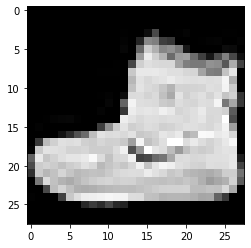

In [ ]:
plt.imshow(X_train[0],cmap='gray' )

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

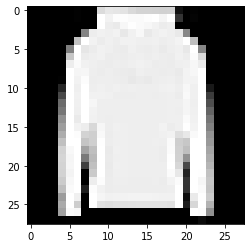

In [ ]:
i=random.randint(1,6000)
plt.imshow(X_train[i],cmap='gray')

In [ ]:
label=y_train[i]
label

2

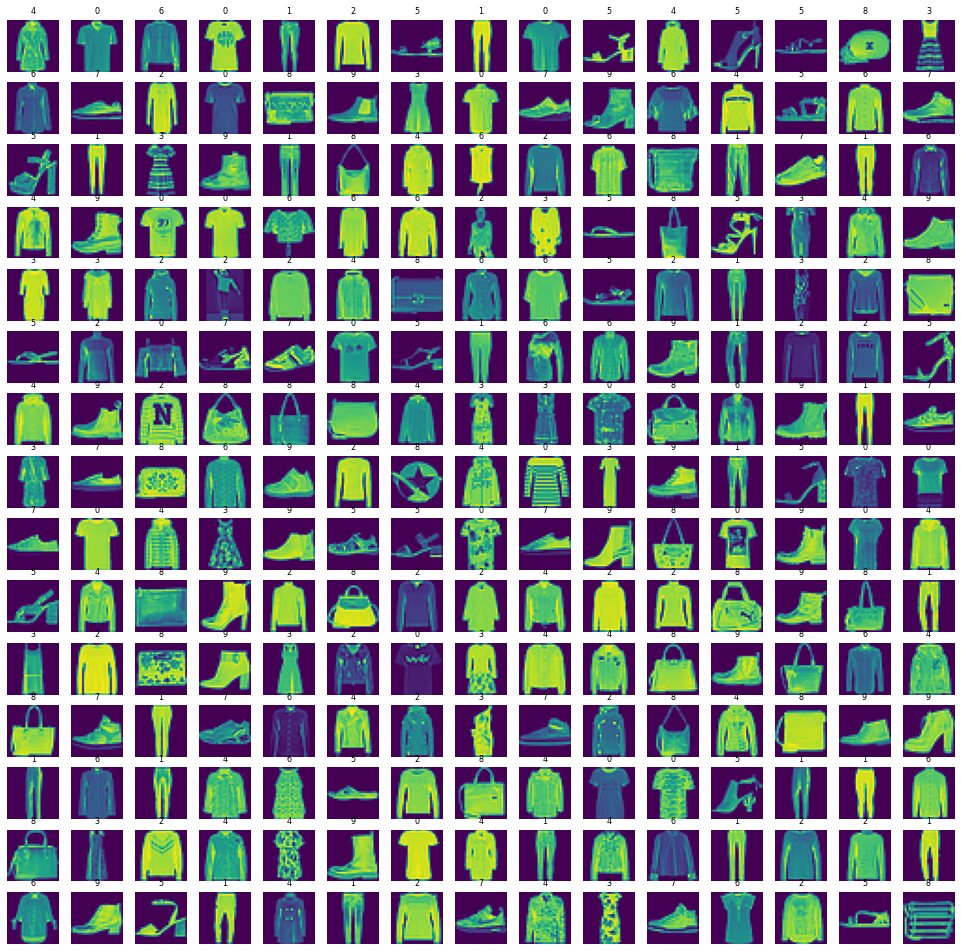

In [ ]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index],fontsize=8)
    axes[i].axis('off')

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
noise_factor=0.3
noise_dataset=[]
for img in X_train:
  noisy_image=img+noise_factor*np.random.rand(*img.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)

In [ ]:
noise_dataset=np.array(noise_dataset)

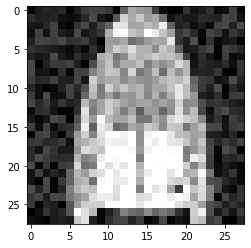

In [ ]:
plt.imshow(noise_dataset[22],cmap="gray")

In [ ]:
noise_factor=0.1
noise_test_dataset=[]
for img in X_test:
    noisy_image=img+noise_factor*np.random.rand(*img.shape)
    noisy_image=np.clip(noisy_image,0,1)
    noise_test_dataset.append(noisy_image)

In [ ]:
noise_test_dataset=np.array(noise_test_dataset)

In [ ]:
autoencoder=tf.keras.models.Sequential()
autoencoder.add(tf.keras.layers.Conv2D(filters=16,kernel_size=3,strides=2,padding='same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(filters=8,kernel_size=3,strides=1,padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=16,kernel_size=3,strides=2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='sigmoid',padding='same'))

In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                X_train.reshape(-1,28,28,1),
                epochs=10,
                batch_size=200,
                validation_data=(noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1)))

Epoch 1/10
300/300 [==============================] - 15s 49ms/step - loss: 0.3891 - val_loss: 0.3244
Epoch 2/10
300/300 [==============================] - 19s 63ms/step - loss: 0.3002 - val_loss: 0.3088
Epoch 3/10
300/300 [==============================] - 15s 48ms/step - loss: 0.2901 - val_loss: 0.3021
Epoch 4/10
300/300 [==============================] - 15s 48ms/step - loss: 0.2845 - val_loss: 0.2969
Epoch 5/10
300/300 [==============================] - 15s 49ms/step - loss: 0.2813 - val_loss: 0.2945
Epoch 6/10
300/300 [==============================] - 15s 48ms/step - loss: 0.2787 - val_loss: 0.2918
Epoch 7/10
300/300 [==============================] - 15s 48ms/step - loss: 0.2770 - val_loss: 0.2897
Epoch 8/10
300/300 [==============================] - 14s 48ms/step - loss: 0.2758 - val_loss: 0.2880
Epoch 9/10
300/300 [==============================] - 15s 48ms/step - loss: 0.2750 - val_loss: 0.2874
Epoch 10/10
300/300 [==============================] - 14s 48ms/step - loss: 0.274

In [ ]:
evaluation=autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1))
print('Test Loss:{:.3f}'.format(evaluation))

313/313 [==============================] - 1s 4ms/step - loss: 0.2872
Test Loss:0.287


In [ ]:
predicted=autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

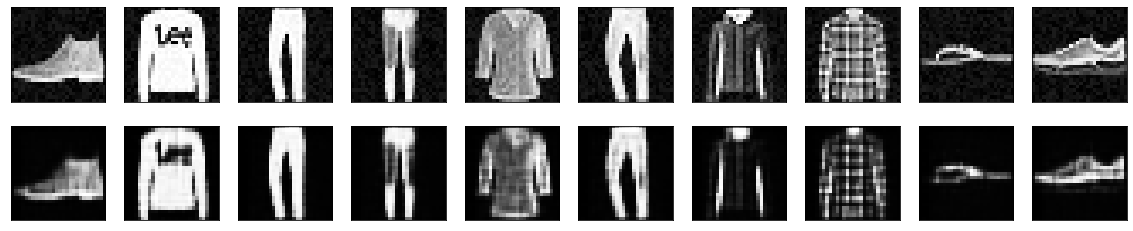

In [ ]:
fig, axes=plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(20,4))
for images,row in zip([noise_test_dataset[:10],predicted],axes):
  for img, ax in zip(images,row):
    ax.imshow(img.reshape((28,28)),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)